 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [105]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [106]:
# Reading whale returns
# set the file path
whale_path = Path("Resources/whale_returns.csv")
# create a Pandas dataframe from a csv file
whale_daily_rtn = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_daily_rtn.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [107]:
# Count nulls
len(whale_daily_rtn) - whale_daily_rtn.count()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [108]:
# Drop nulls
whale_daily_clean = whale_daily_rtn.dropna()
whale_daily_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [109]:
# Count nulls to comfirm
len(whale_daily_clean) - whale_daily_clean.count()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

 #combine 2 plots


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [110]:
# Reading algorithmic returns
# set the file path
algo_path = Path("Resources/algo_returns.csv")
# create a Pandas dataframe from a csv file
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [111]:
# Count nulls
len(algo_df) - algo_df.count()

Algo 1    0
Algo 2    6
dtype: int64

In [112]:
# Drop nulls
algo_daily_clean = algo_df.dropna()
algo_daily_clean.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [113]:
# Reading S&P 500 Closing Prices
# set the file path
sp500_path = Path("Resources/sp500_history.csv")
# create a Pandas dataframe from a csv file
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [114]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [115]:
# Remove $ sign to fix data type
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [116]:
# Fix Data Types
sp500_df['Close'] =sp500_df['Close'].astype(str).astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [117]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [118]:
# Drop nulls
sp500_daily_clean = sp500_daily_returns.dropna()
sp500_daily_clean.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [119]:
# Count nulls
len(sp500_daily_clean) - sp500_daily_clean.count()

Close    0
dtype: int64

In [120]:
# Rename `Close` Column to be specific to this portfolio.
sp500_final = sp500_daily_clean.rename(columns={'Close':'S&P500'})
sp500_final.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [121]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df=pd.concat([whale_daily_clean, algo_daily_clean, sp500_final], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Whale Daily Returns'}, xlabel='Date'>

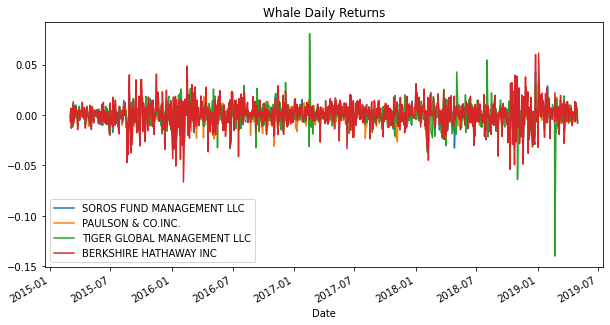

In [122]:
# to plot the whale portfolio
whale_daily_clean.plot(figsize=(10,5), title="Whale Daily Returns")

<AxesSubplot:title={'center':'Algorithmic Daily Returns'}, xlabel='Date'>

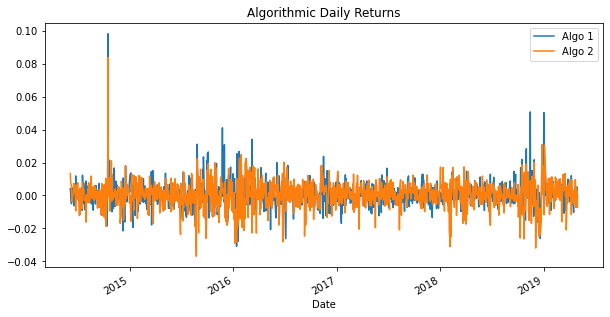

In [123]:
# Plot dairy return of the Algorithmic portfolio
algo_daily_clean.plot(figsize=(10,5), title="Algorithmic Daily Returns")

<AxesSubplot:title={'center':'S&P500 Daily Returns'}, xlabel='Date'>

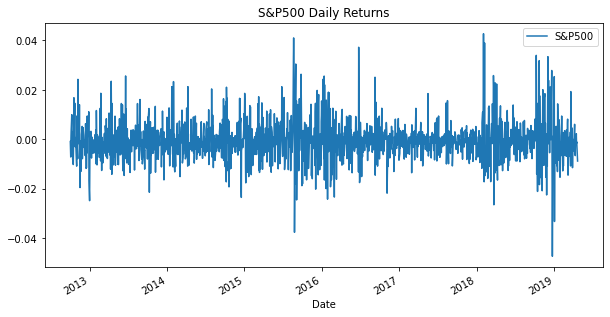

In [124]:
# Plot dairy return of S&P500
sp500_final.plot(figsize=(10,5), title="S&P500 Daily Returns")

#### Calculate and Plot cumulative returns.

In [125]:
# whale cumulative returns
whale_cumulative = (1 + whale_daily_clean).cumprod() -1
whale_cumulative.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466


<AxesSubplot:title={'center':'Whale Cumulative Returns'}, xlabel='Date'>

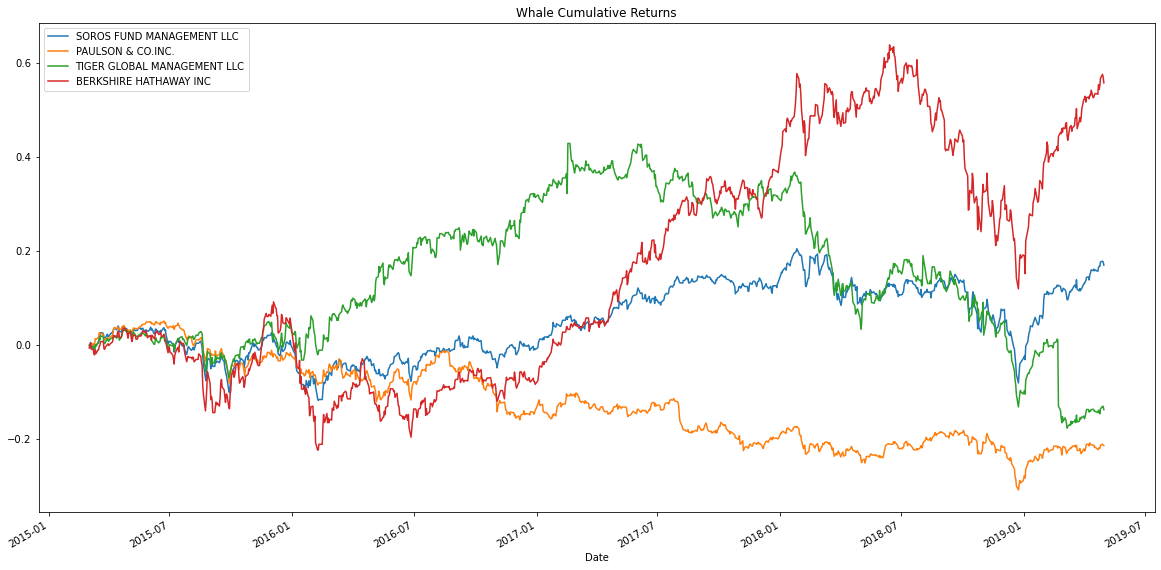

In [126]:
# Plot Whale'scumulative returns
whale_cumulative.plot(figsize=(20, 10), title = "Whale Cumulative Returns")

In [127]:
# Algorithmic's cumulative returns
algo_cumulative = (1 + algo_daily_clean).cumprod() -1
algo_cumulative.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.005927,0.021679
2014-06-09,0.000885,0.027470
2014-06-10,0.005295,0.026714
2014-06-11,0.010081,0.022852


<AxesSubplot:title={'center':'Algorithmic Cumulative Returns'}, xlabel='Date'>

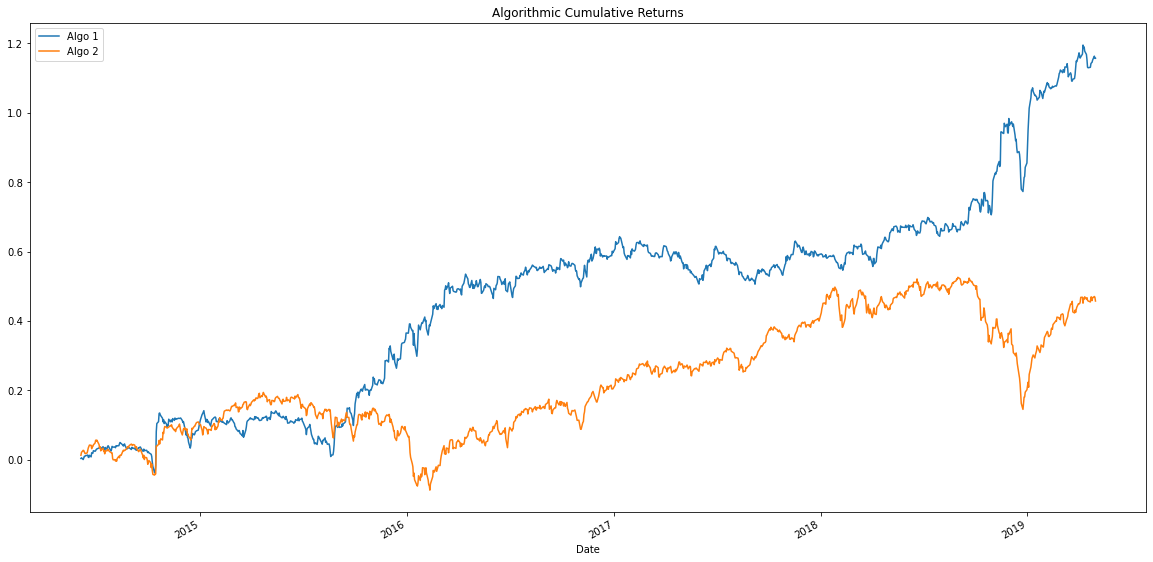

In [128]:
# Plot Algorithmic's cumulative returns
algo_cumulative.plot(figsize=(20, 10), title = "Algorithmic Cumulative Returns")

In [129]:
# S&P500 cumulative returns
sp500_cumulative = (1 + sp500_final).cumprod() -1
sp500_cumulative.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.009766
2019-04-17,-0.011327
2019-04-16,-0.009074
2019-04-15,-0.009578


<AxesSubplot:title={'center':'S&P500 Cumulative Returns'}, xlabel='Date'>

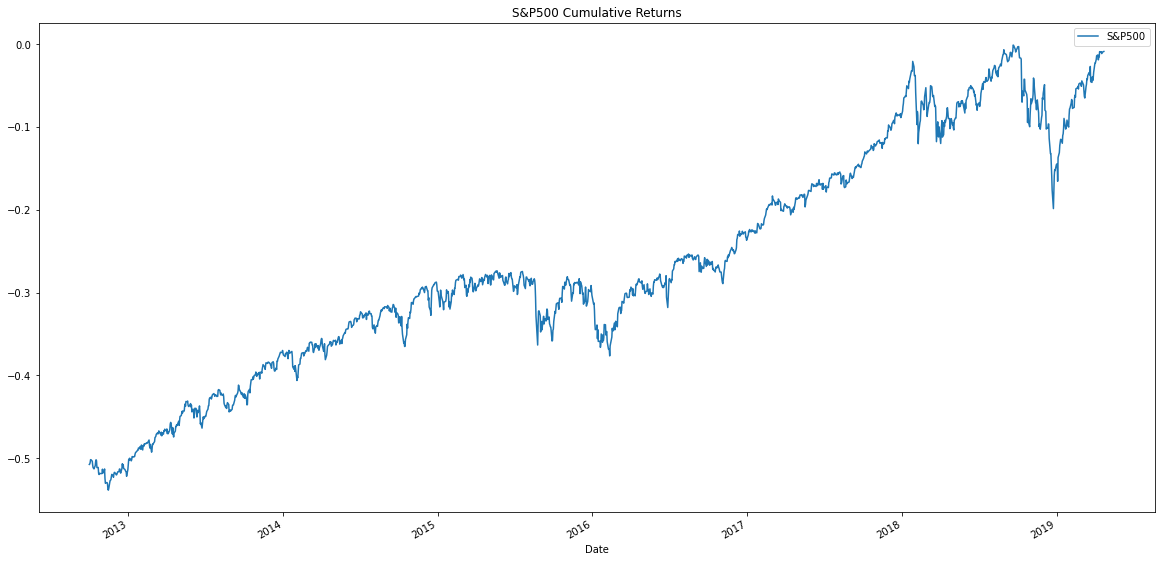

In [130]:
# Plot S&P500 cumulative returns
sp500_cumulative.plot(figsize=(20, 10), title = "S&P500 Cumulative Returns")

In [131]:
# Join cumulative returns of Whale, Algorithmic, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_cumulative=pd.concat([whale_cumulative, algo_cumulative, sp500_cumulative], axis='columns', join='inner')
combined_cumulative.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.104979,0.156329,-0.281524
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,0.095489,0.159122,-0.284677
2015-03-05,0.004981,0.002314,-0.000681,0.004327,0.094442,0.164134,-0.283821
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,0.089018,0.150792,-0.293972
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,0.083086,0.152292,-0.291187


<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

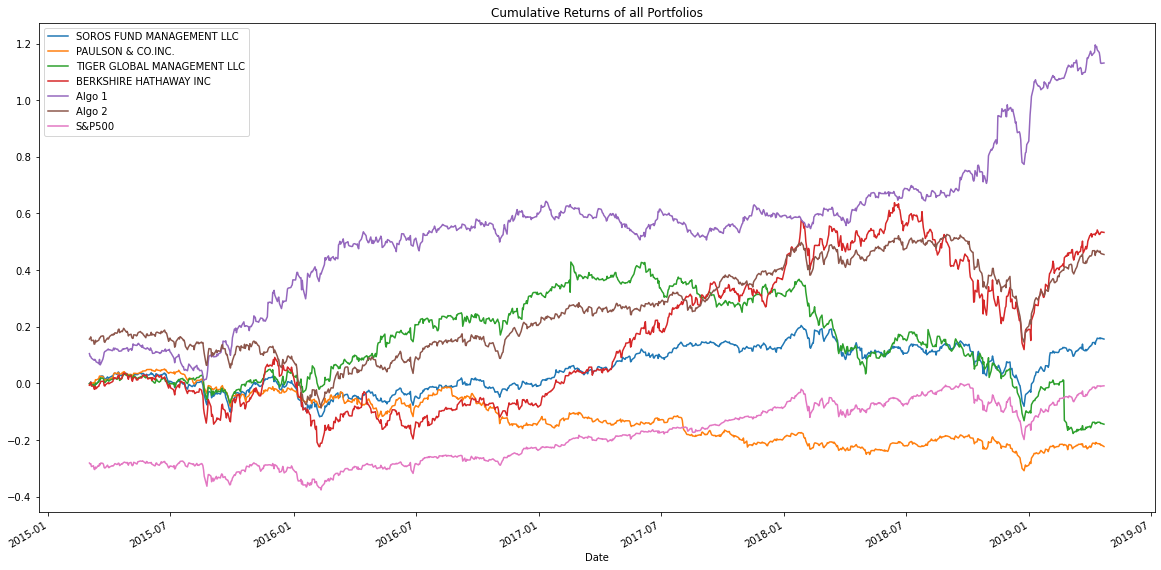

In [132]:
# Plot combined cumulative returns
combined_cumulative.plot(figsize=(20, 10), title = "Cumulative Returns of all Portfolios")

In [133]:
# to find the begining date in the dataframe
beg_date = combined_cumulative.iloc[1:2,]
print(beg_date)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-04                   0.000962           -0.001755   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-04                    -0.003028               -0.002383  0.095489   

              Algo 2    S&P500  
Date                            
2015-03-04  0.159122 -0.284677  


In [134]:
# to find the most recent date (last date) in the dataframe
rows = combined_cumulative.iloc[-1:]
print(rows)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-22                    0.15628           -0.223061   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-22                    -0.144348                0.533046  1.131361   

              Algo 2    S&P500  
Date                            
2019-04-22  0.455062 -0.008764  


In [135]:
# Conclusion: Algo 1, Algo 2, Berkshire Hathaway, and Soros Fund Management outperformed 
# the S&P500 for the period from March 4, 2015 to April 22, 2019

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [136]:
# Box plot to visually show risk
# Calculate daily standard deviations
whale_std = whale_daily_clean.std()
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [137]:
algo_std = algo_daily_clean.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [138]:
sp500_std= sp500_final.std()
sp500_std

S&P500    0.008135
dtype: float64

<AxesSubplot:>

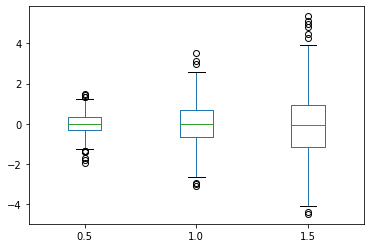

In [139]:
whale_std = np.random.normal(scale=0.5, size=1000)
algo_std = np.random.normal(scale=1.0, size=1000)
sp500_std = np.random.normal(scale=1.5, size=1000)

portfolio_std = pd.DataFrame({"0.5": whale_std, "1.0": algo_std, "1.5":sp500_std})
portfolio_std.plot.box()

### Calculate Standard Deviations

In [140]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_daily_clean.std()
print(whale_std)
algo_std = algo_daily_clean.std()
print(algo_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Algo 1    0.007988
Algo 2    0.008466
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [141]:
# Calculate the daily standard deviation of S&P 500
sp500_std= sp500_final.std()
sp500_std

S&P500    0.008135
dtype: float64

In [142]:
# Determine which portfolios are riskier than the S&P 500
    # Based on the dairly standard diviation, Algo 2, TIGER GLOBAL MANAGEMENT LLC  and BERKSHIRE HATHAWAY INC are risker than S&P 500.

### Calculate the Annualized Standard Deviation

In [143]:
# Calculate the annualized standard deviation (252 trading days) of whale
whale_daily_std = whale_daily_clean.std()
whale_annual_std = whale_std*np.sqrt(252)
whale_annual_std


SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [144]:
# Calculate the annualized standard deviation (252 trading days) of Algorithmic
algo_daily_std = algo_daily_clean.std()
algo_annaul_std=algo_daily_std*np.sqrt(252)
algo_annaul_std


Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [145]:
# Calculate the annualized standard deviation (252 trading days) of S&P500
sp500_daily_std= sp500_final.std()
sp500_annaul_std=sp500_daily_std*np.sqrt(252)
sp500_annaul_std

S&P500    0.129133
dtype: float64

<AxesSubplot:ylabel='Frequency'>

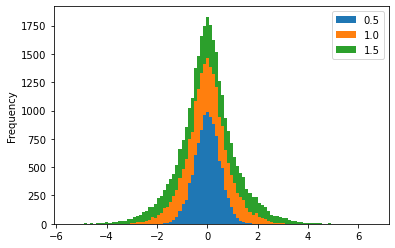

In [146]:
whale_annual_std_plot= np.random.normal(scale=0.5, size=10000)
algo_annaul_std_plot= np.random.normal(scale=1.0, size=10000)
sp500_annaul_std_plot = np.random.normal(scale=1.5, size=10000)

portfolio_annual_std = pd.DataFrame({
    "0.5": whale_annual_std_plot,
    "1.0": algo_annaul_std_plot,
    "1.5": sp500_annaul_std_plot
})

portfolio_annual_std.plot.hist(stacked=True, bins=100)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [147]:
# Whale: calculate the rolling standard deviation by using a 21-day window
rolling_whale_std = whale_daily_clean.rolling(window = 21).std()
rolling_whale_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Whale Rolling 21-day standard deviation'}, xlabel='Date'>

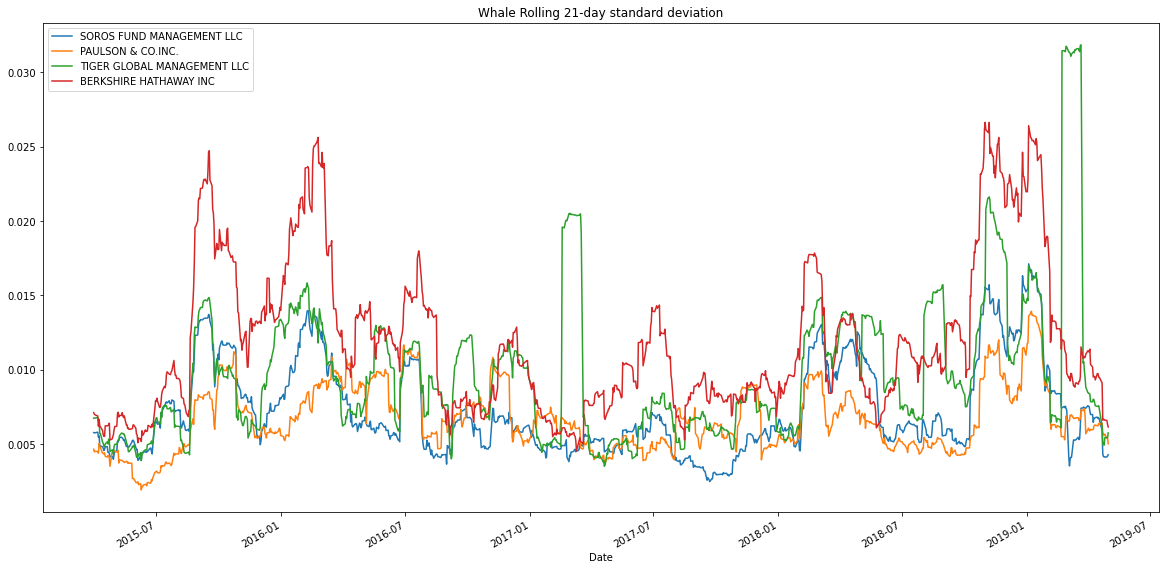

In [148]:
# Plot the rolling standard deviation for Whale
rolling_whale_std.plot(figsize=(20, 10), title='Whale Rolling 21-day standard deviation')

In [149]:
# Algorithmic: calculate the rolling standard deviation by using a 21-day window
rolling_algo_std = algo_daily_clean.rolling(window = 21).std()
rolling_algo_std.head()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
2014-06-09,NaN,NaN
2014-06-10,NaN,NaN
2014-06-11,NaN,NaN


<AxesSubplot:title={'center':'Algorithmic Rolling 21-day standard deviation'}, xlabel='Date'>

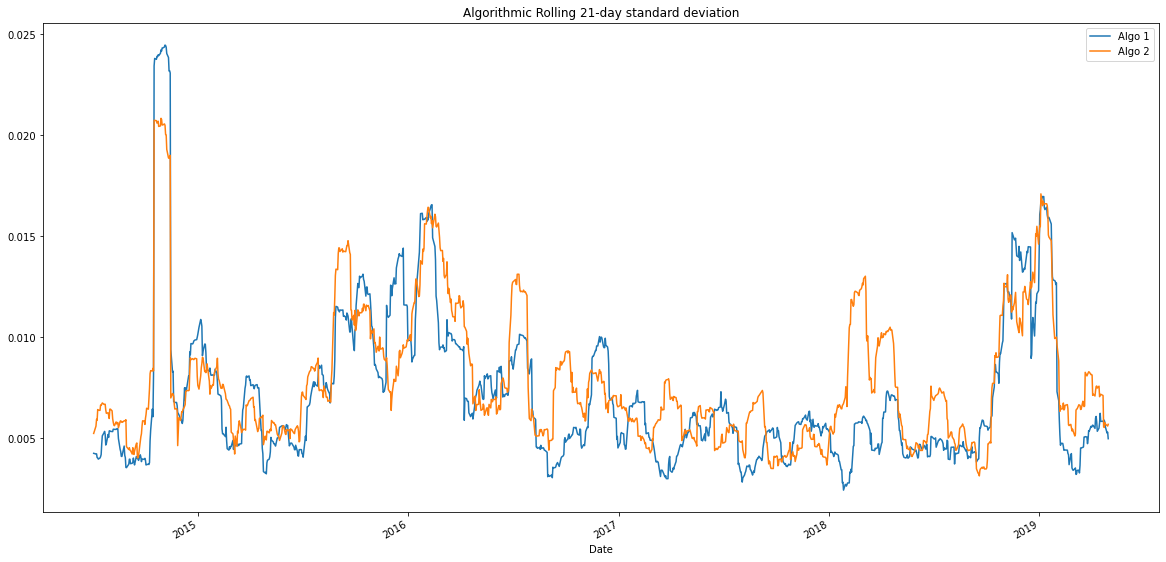

In [150]:
# Plot the rolling standard deviation for Algo
rolling_algo_std.plot(figsize=(20, 10), title='Algorithmic Rolling 21-day standard deviation')

In [151]:
# S&P 500: calculate the rolling standard deviation by using a 21-day window
rolling_sp500_std = sp500_final.rolling(window = 21).std()
rolling_sp500_std.head()

,S&P500
Date,
2019-04-22,NaN
2019-04-18,NaN
2019-04-17,NaN
2019-04-16,NaN
2019-04-15,NaN


<AxesSubplot:title={'center':'Algorithmic Rolling 21-day standard deviation'}, xlabel='Date'>

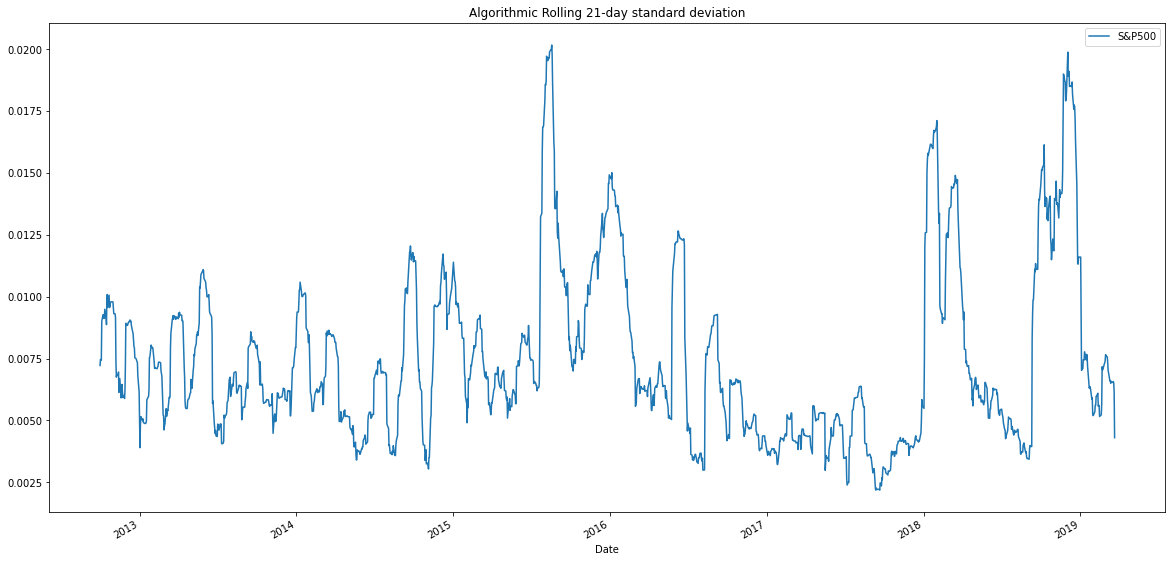

In [152]:
# Plot the rolling standard deviation for S&P 500
rolling_sp500_std.plot(figsize=(20, 10), title='Algorithmic Rolling 21-day standard deviation')

### Calculate and plot the correlation

In [153]:
# Calculate the correlation
correlation_daily_returns =combined_df.corr()
correlation_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963


<AxesSubplot:>

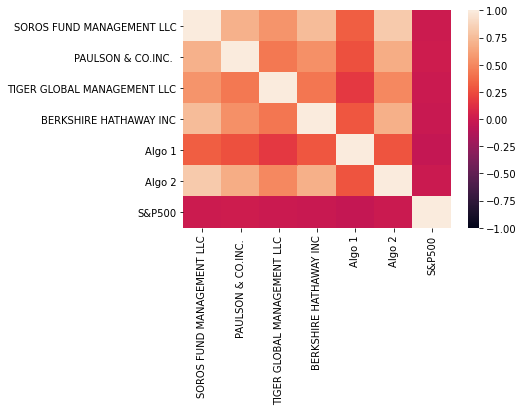

In [154]:
# Display de correlation matrix
sns.heatmap(correlation_daily_returns, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [155]:
# Calculate covariance of a single portfolio
covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P500'])
covariance_soros

3.889726983063765e-08

In [156]:
# Calculate variance of S&P 500
sp500_variance = combined_df['S&P500'].var()
sp500_variance

7.373467552840441e-05

In [157]:
# Computing beta
soros_beta = covariance_soros/sp500_variance
soros_beta

0.0005275302230855206

In [158]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [159]:
# Rename a column of combined_df 
renamed_combined_df=combined_df.rename(columns={'SOROS FUND MANAGEMENT LLC': 'SOROS'})
renamed_combined_df.head()

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [160]:
soros_sp500_df = renamed_combined_df.loc[:,['SOROS', 'S&P500']]
soros_sp500_df.head()

,SOROS,S&P500
Date,,
2015-03-03,-0.001266,0.004408
2015-03-04,0.002230,-0.001195
2015-03-05,0.004016,0.014378
2015-03-06,-0.007905,-0.003929
2015-03-09,0.000582,0.017254


In [161]:
# Calculate 30-day rolling covariance of Soros to SP500
rolling_covariance = soros_sp500_df['SOROS'].rolling(window=30).cov(soros_sp500_df['S&P500'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000008
2019-04-16    0.000009
2019-04-17    0.000012
2019-04-18    0.000014
2019-04-22    0.000014
Length: 1042, dtype: float64

In [162]:
# Calculate 30-day rolling variance of S&P 500
rolling_variance = soros_sp500_df['S&P500'].rolling(window=30).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000043
2019-04-16    0.000041
2019-04-17    0.000038
2019-04-18    0.000037
2019-04-22    0.000034
Name: S&P500, Length: 1042, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros'}, xlabel='Date'>

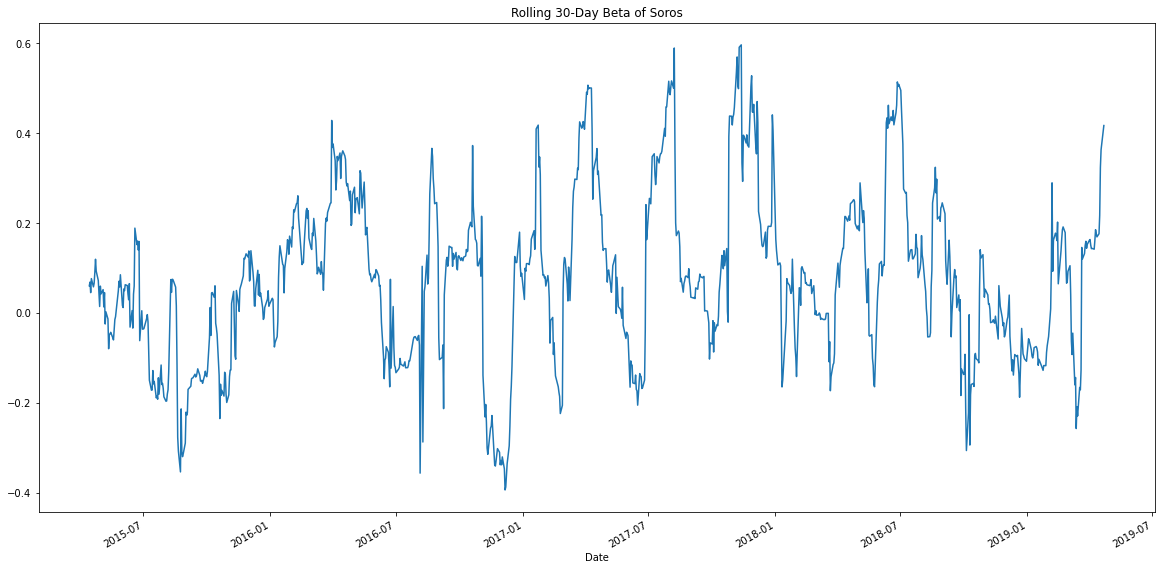

In [163]:
# Calculate 30-day rolling beta of Soros and plot the deta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Soros')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [164]:
# Use `ewm` to calculate the 30 days rolling window for Soros
ewm_soros=soros_sp500_df["SOROS"].ewm(span=30, adjust=False).mean()
ewm_soros.head()

Date
2015-03-03   -0.001266
2015-03-04   -0.001040
2015-03-05   -0.000714
2015-03-06   -0.001178
2015-03-09   -0.001064
Name: SOROS, dtype: float64

<AxesSubplot:title={'center':'Exponentilaly Weited 30-Day daily returns of Soros'}, xlabel='Date'>

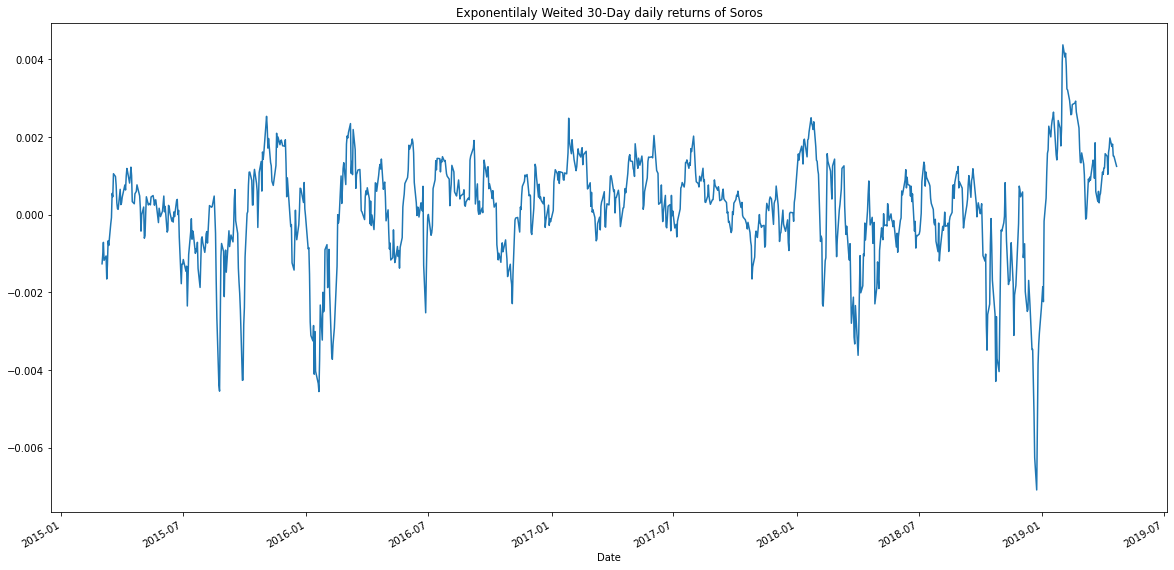

In [165]:
# Plot Soro's EWM result
ewm_soros.plot(figsize=(20, 10), title='Exponentilaly Weited 30-Day daily returns of Soros')

In [166]:
# Use `ewm` to calculate the 30 days rolling window for S&P 500
ewm_sp500= soros_sp500_df["S&P500"].ewm(span=30, adjust=False).mean()
ewm_sp500.head()

Date
2015-03-03    0.004408
2015-03-04    0.004046
2015-03-05    0.004713
2015-03-06    0.004155
2015-03-09    0.005000
Name: S&P500, dtype: float64

<AxesSubplot:title={'center':'Exponentilaly Weited 30-Day daily returns of S&P 500'}, xlabel='Date'>

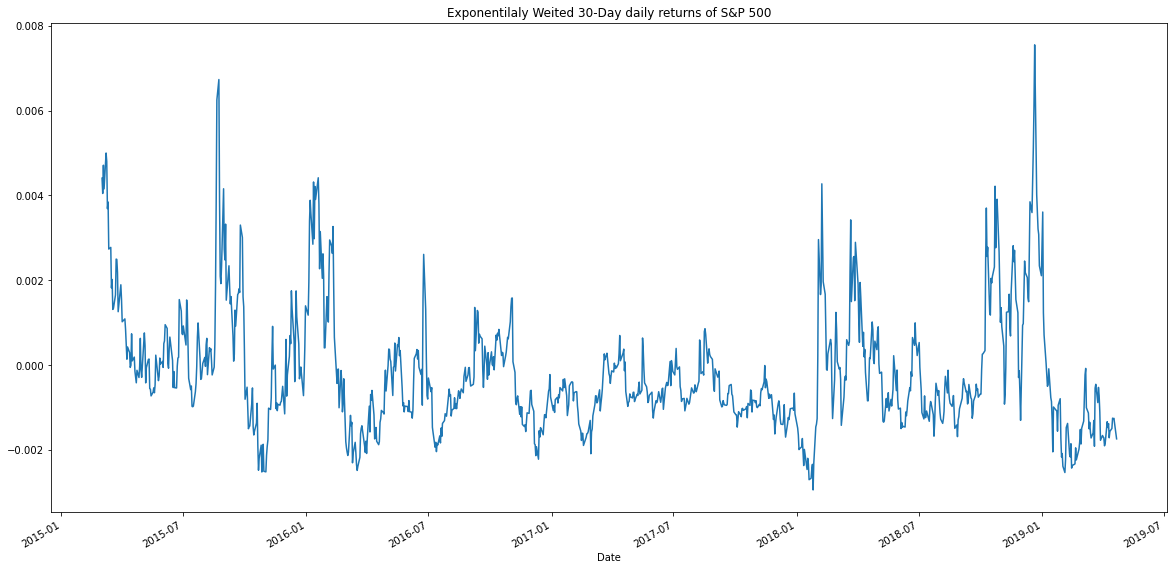

In [167]:
# Plot S&P 500 EWM result
ewm_sp500.plot(figsize=(20, 10), title='Exponentilaly Weited 30-Day daily returns of S&P 500')

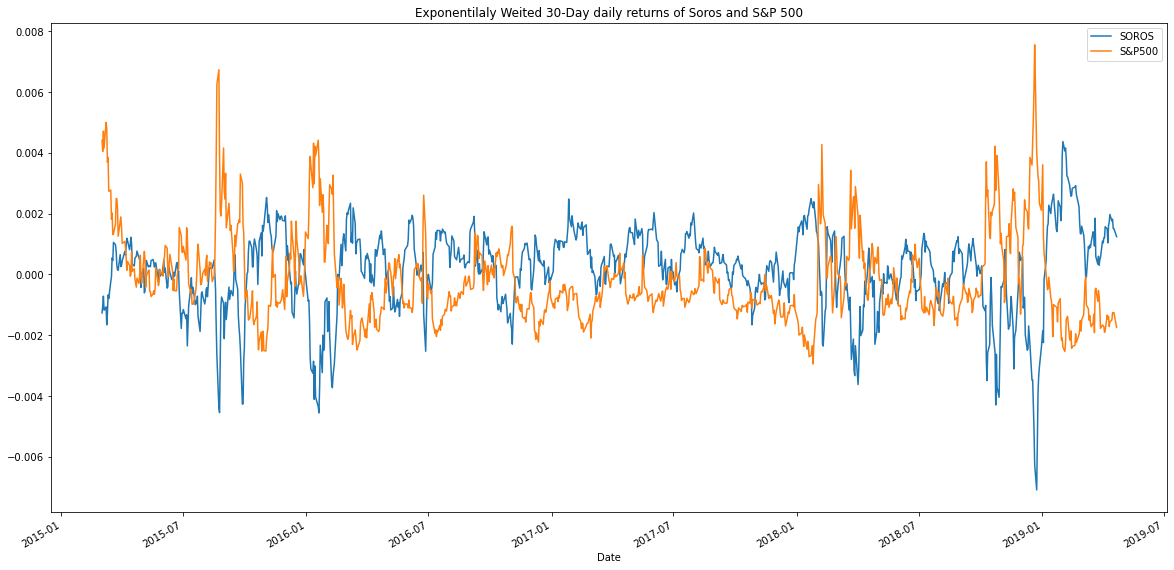

In [168]:
# Combine plots of Soros and S&P500 'ewm'
ax=ewm_soros.plot(figsize=(20, 10), legend=True)
ax=ewm_sp500.plot(figsize=(20, 10), title='Exponentilaly Weited 30-Day daily returns of Soros and S&P 500', legend=True)

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [169]:
# Annualized Sharpe Ratios
sharpe_ratio = ((combined_df.mean()-combined_df['S&P500'].mean()) *252)/(combined_df.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
S&P500                         0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

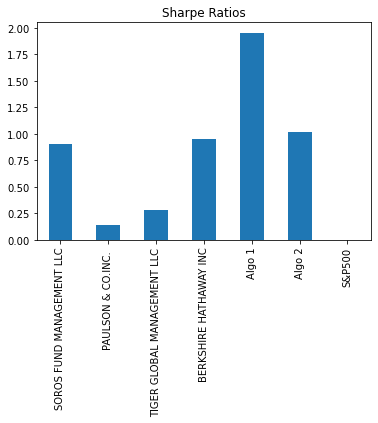

In [170]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [304]:
#Reading SP_500 Yr 2020
# set the file path
sp500_2020_path = Path("Resources/sp500_2020.csv")
# create a Pandas dataframe from a csv file
sp500_2020 = pd.read_csv(sp500_2020_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_2020.head()

,Close
Date,
2020-01-02 16:00:00,3257.85
2020-01-03 16:00:00,3234.85
2020-01-06 16:00:00,3246.28
2020-01-07 16:00:00,3237.18
2020-01-08 16:00:00,3253.05


In [307]:
# Re-format index to show "Date" only
sp500_2020.index = tsla_df.index.normalize()
sp500_2020

,Close
Date,
2020-01-02,3257.85
2020-01-03,3234.85
2020-01-06,3246.28
2020-01-07,3237.18
2020-01-08,3253.05
...,...
2020-12-23,3690.01
2020-12-24,3703.06
2020-12-28,3735.36


In [309]:
# Re-name the column
sp500_2020_f=sp500_2020.rename(columns={"Close": "SP500"})
sp500_2020_f.head()

,SP500
Date,
2020-01-02,3257.85
2020-01-03,3234.85
2020-01-06,3246.28
2020-01-07,3237.18
2020-01-08,3253.05


In [310]:
# Reading data from 1st stock, Tesla
# set the file path
tsla_path = Path("Resources/tsla_historical.csv")
# create a Pandas dataframe from a csv file
tsla_price = pd.read_csv(tsla_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_price.head()

,Close
Date,
2020-01-02 16:00:00,86.05
2020-01-03 16:00:00,88.60
2020-01-06 16:00:00,90.31
2020-01-07 16:00:00,93.81
2020-01-08 16:00:00,98.43


In [312]:
# Re-format index
tsla_price.index = tsla_price.index.normalize()
tsla_price.head()

,Close
Date,
2020-01-02,86.05
2020-01-03,88.60
2020-01-06,90.31
2020-01-07,93.81
2020-01-08,98.43


In [317]:
# Re-name the column
tsla_df=tsla_price.rename(columns={"Close": "Tesla"})
tsla_df.head()

,Tesla
Date,
2020-01-02,86.05
2020-01-03,88.60
2020-01-06,90.31
2020-01-07,93.81
2020-01-08,98.43


In [318]:
# Reading data from 2nd stock
# set the file path
gm_path = Path("Resources/gm_historical.csv")
# create a Pandas dataframe from a csv file
gm_price = pd.read_csv(gm_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
gm_price.head()

,Close
Date,
2020-01-02 16:00:00,37.38
2020-01-03 16:00:00,36.32
2020-01-06 16:00:00,35.84
2020-01-07 16:00:00,35.15
2020-01-08 16:00:00,34.65


In [319]:
# Re-name the dataframe
gm_df=gm_price.rename(columns={"Close": "GM"})
gm_df.head()

,GM
Date,
2020-01-02 16:00:00,37.38
2020-01-03 16:00:00,36.32
2020-01-06 16:00:00,35.84
2020-01-07 16:00:00,35.15
2020-01-08 16:00:00,34.65


In [321]:
# Re-format index to show only date
gm_df.index = gm_df.index.normalize()
gm_df.head()

,GM
Date,
2020-01-02,37.38
2020-01-03,36.32
2020-01-06,35.84
2020-01-07,35.15
2020-01-08,34.65


In [322]:
# Reading data from 3rd stock
# set the file path
wba_path = Path("Resources/wba_historical.csv")
# create a Pandas dataframe from a csv file
wba_price = pd.read_csv(wba_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
wba_price.head()

,Close
Date,
2020-01-02 16:00:00,59.08
2020-01-03 16:00:00,59.08
2020-01-06 16:00:00,59.59
2020-01-07 16:00:00,59.29
2020-01-08 16:00:00,55.83


In [324]:
# rename the column
wba_df=wba_price.rename(columns={"Close": "Walgreens"})
wba_df.head()

,Walgreens
Date,
2020-01-02 16:00:00,59.08
2020-01-03 16:00:00,59.08
2020-01-06 16:00:00,59.59
2020-01-07 16:00:00,59.29
2020-01-08 16:00:00,55.83


In [325]:
# Re-format index 
wba_df.index = wba_df.index.normalize()
wba_df.head()

,Walgreens
Date,
2020-01-02,59.08
2020-01-03,59.08
2020-01-06,59.59
2020-01-07,59.29
2020-01-08,55.83


In [326]:
# Combine all stocks in a single DataFrame
combined_prices=pd.concat([tsla_df_f, gm_df, wba_df], axis='columns', join='inner')
combined_prices.head()

,Tesla,GM,Walgreens
Date,,,
2020-01-02,86.05,37.38,59.08
2020-01-03,88.60,36.32,59.08
2020-01-06,90.31,35.84,59.59
2020-01-07,93.81,35.15,59.29
2020-01-08,98.43,34.65,55.83


<AxesSubplot:title={'center':'Closing Prices'}, xlabel='Date'>

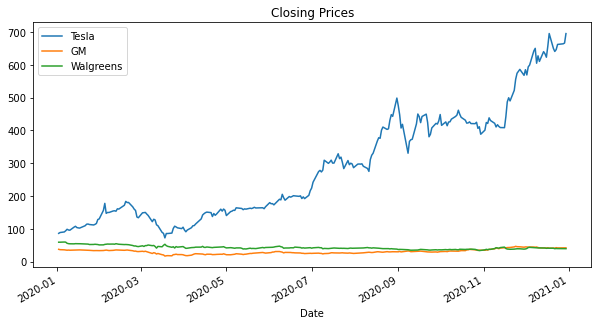

In [327]:
#Combine 3 dataframes
combined_prices.plot(figsize=(10, 5), title='Closing Prices')

In [328]:
# Calculate daily returns
daily_returns=combined_prices.pct_change()
daily_returns.head()

,Tesla,GM,Walgreens
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,0.029634,-0.028357,0.000000
2020-01-06,0.019300,-0.013216,0.008632
2020-01-07,0.038755,-0.019252,-0.005034
2020-01-08,0.049248,-0.014225,-0.058357


In [329]:
# calculate the average of daily returns
daily_returns.mean()

Tesla        0.009951
GM           0.001196
Walgreens   -0.001149
dtype: float64

<AxesSubplot:title={'center':'daily_returns'}, xlabel='Date'>

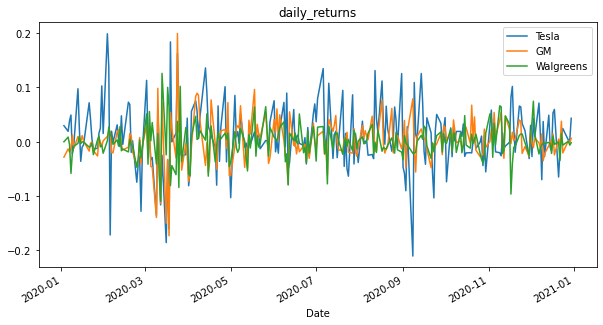

In [330]:
daily_returns.plot(figsize=(10,5), title='daily_returns')

In [331]:
# Calculate cumulative returns
mycumulative_returns=(1 + daily_returns.cumprod() - 1)
mycumulative_returns.head()

,Tesla,GM,Walgreens
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,0.029634,-2.835741e-02,0.0
2020-01-06,0.000572,3.747675e-04,0.0
2020-01-07,0.000022,-7.215112e-06,0.0
2020-01-08,0.000001,1.026332e-07,0.0


In [332]:
# Drop NAs
daily_returns_cln=daily_returns.dropna()

In [333]:
# Count number of NAs
daily_returns_cln.isnull().sum(axis = 0)

Tesla        0
GM           0
Walgreens    0
dtype: int64

In [334]:
# Display sample data
daily_returns_cln.head()

,Tesla,GM,Walgreens
Date,,,
2020-01-03,0.029634,-0.028357,0.000000
2020-01-06,0.019300,-0.013216,0.008632
2020-01-07,0.038755,-0.019252,-0.005034
2020-01-08,0.049248,-0.014225,-0.058357
2020-01-09,-0.021945,0.012410,-0.020598


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [335]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
# Display sample data
weighted_portfolio_returns = daily_returns_cln.dot(weights)
weighted_portfolio_returns.head()

Date
2020-01-03    0.000426
2020-01-06    0.004906
2020-01-07    0.004823
2020-01-08   -0.007778
2020-01-09   -0.010044
dtype: float64

In [336]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_weighted=pd.concat([daily_returns_cln, weighted_portfolio_returns], axis='columns', join='inner')
combined_returns_weighted.head()

,Tesla,GM,Walgreens,0
Date,,,,
2020-01-03,0.029634,-0.028357,0.000000,0.000426
2020-01-06,0.019300,-0.013216,0.008632,0.004906
2020-01-07,0.038755,-0.019252,-0.005034,0.004823
2020-01-08,0.049248,-0.014225,-0.058357,-0.007778
2020-01-09,-0.021945,0.012410,-0.020598,-0.010044


In [337]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
dropan_returns_weighted=combined_returns_weighted.dropna()
dropan_returns_weighted.head()

,Tesla,GM,Walgreens,0
Date,,,,
2020-01-03,0.029634,-0.028357,0.000000,0.000426
2020-01-06,0.019300,-0.013216,0.008632,0.004906
2020-01-07,0.038755,-0.019252,-0.005034,0.004823
2020-01-08,0.049248,-0.014225,-0.058357,-0.007778
2020-01-09,-0.021945,0.012410,-0.020598,-0.010044


In [339]:
# Count NAs
dropan_returns_weighted.isnull().sum(axis = 0)

Tesla        0
GM           0
Walgreens    0
0            0
dtype: int64

In [340]:
named_returns_weighted=dropan_returns_weighted.rename(columns = {0: "Weighted"})
named_returns_weighted.head()

,Tesla,GM,Walgreens,Weighted
Date,,,,
2020-01-03,0.029634,-0.028357,0.000000,0.000426
2020-01-06,0.019300,-0.013216,0.008632,0.004906
2020-01-07,0.038755,-0.019252,-0.005034,0.004823
2020-01-08,0.049248,-0.014225,-0.058357,-0.007778
2020-01-09,-0.021945,0.012410,-0.020598,-0.010044


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [341]:
# Calculate the annualized `std` standard diviation of daily returns
daily_std = named_returns_weighted.std()
daily_std

Tesla        0.056469
GM           0.038623
Walgreens    0.030703
Weighted     0.030832
dtype: float64

In [342]:
# Calculate the annualized `std` (252 trading days) of closing prices
annual_std = daily_std*np.sqrt(252)
annual_std

Tesla        0.896414
GM           0.613115
Walgreens    0.487392
Weighted     0.489449
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [343]:
# Calculate 21 days rolling standard deviation
rolling_std = named_returns_weighted.rolling(window = 21).std()
rolling_std.head(30)

,Tesla,GM,Walgreens,Weighted
Date,,,,
2020-01-03,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,NaN,NaN,NaN,NaN
2020-01-15,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Rolling 21 days standared diviation'}, xlabel='Date'>

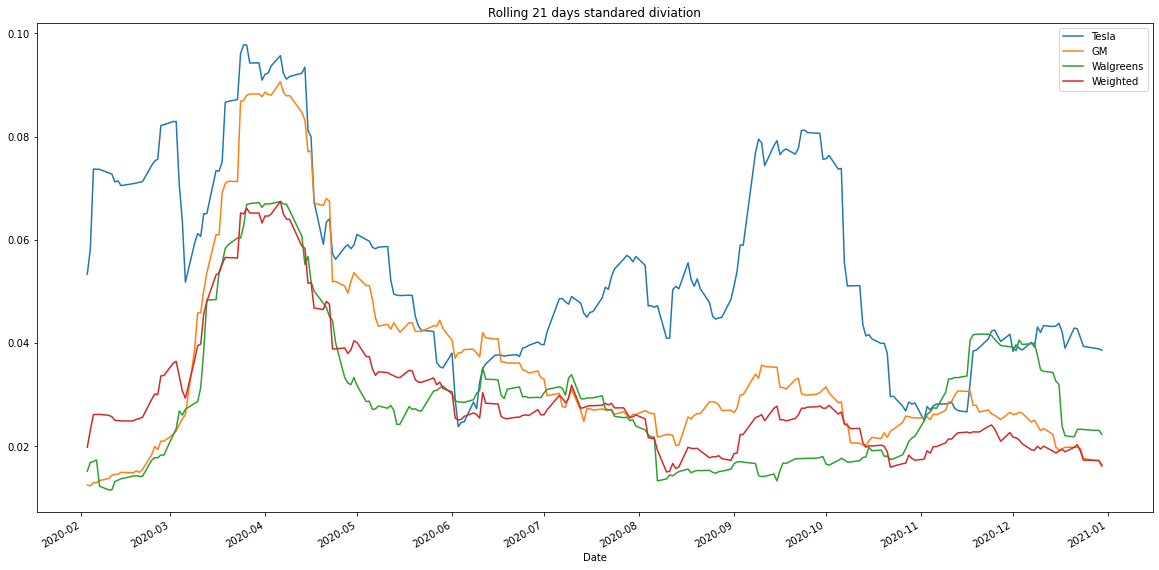

In [344]:
# Plot rolling standard deviation
rolling_std.plot(figsize=(20, 10), title='Rolling 21 days standared diviation')

### Calculate and plot the correlation

In [399]:
# Calculate and plot the correlation
correlation = named_returns_weighted.corr()
correlation

,Tesla,GM,Walgreens,Weighted
Tesla,1.000000,0.354908,0.100262,0.791966
GM,0.354908,1.000000,0.437200,0.779344
Walgreens,0.100262,0.437200,1.000000,0.575697
Weighted,0.791966,0.779344,0.575697,1.000000


<AxesSubplot:>

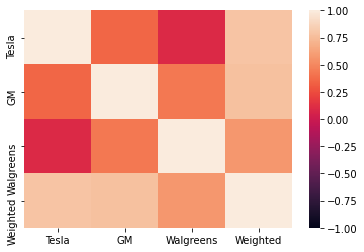

In [400]:
# Plot the correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [401]:
#calcluate daily returns for S&P_2020
sp500_daily_returns=sp500_2020_f.pct_change()
sp500_daily_returns.head()

,SP500
Date,
2020-01-02,NaN
2020-01-03,-0.007060
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902


In [402]:
# Combine daily returns of portfolio and S&P 500
mine_sp500 = pd.concat([named_returns_weighted, sp500_daily_returns], axis='columns', join='inner')
mine_sp500

,Tesla,GM,Walgreens,Weighted,SP500
Date,,,,,
2020-01-03,0.029634,-0.028357,0.000000,0.000426,-0.007060
2020-01-06,0.019300,-0.013216,0.008632,0.004906,0.003533
2020-01-07,0.038755,-0.019252,-0.005034,0.004823,-0.002803
2020-01-08,0.049248,-0.014225,-0.058357,-0.007778,0.004902
2020-01-09,-0.021945,0.012410,-0.020598,-0.010044,0.006655
...,...,...,...,...,...
2020-12-23,0.008808,0.037897,0.015279,0.020661,0.000746
2020-12-24,0.024443,-0.020495,-0.006270,-0.000774,0.003537
2020-12-28,0.002901,0.001924,0.001010,0.001945,0.008723


<AxesSubplot:xlabel='Date'>

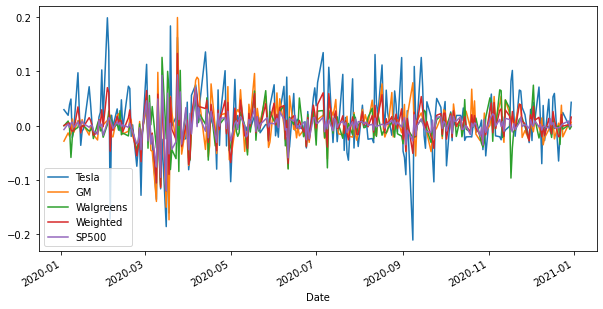

In [403]:
# plot the daily returns
mine_sp500.plot(figsize=(10, 5))

In [404]:
# Calcluate the avearage daily returns of each columns
mine_sp500.mean()

Tesla        0.009951
GM           0.001196
Walgreens   -0.001149
Weighted     0.003333
SP500        0.000780
dtype: float64

In [414]:
# Calculate cumulative returns
cumulative_returns=(1 + mine_sp500.cumprod() - 1)
cumulative_returns.head()

,Tesla,GM,Walgreens,Weighted,SP500
Date,,,,,
2020-01-03,2.963393e-02,-2.835741e-02,0.0,4.255078e-04,-7.059871e-03
2020-01-06,5.719416e-04,3.747675e-04,0.0,2.087361e-06,-2.494531e-05
2020-01-07,2.216582e-05,-7.215112e-06,0.0,1.006718e-08,6.992690e-08
2020-01-08,1.091633e-06,1.026332e-07,0.0,-7.830081e-11,3.428107e-10
2020-01-09,-2.395538e-08,1.273658e-09,0.0,7.864820e-13,2.281508e-12


In [422]:
# calculate the correlation and plot
combined_correlation = mine_sp500.corr()
combined_correlation

,Tesla,GM,Walgreens,Weighted,SP500
Tesla,1.000000,0.354908,0.100262,0.791966,0.474986
GM,0.354908,1.000000,0.437200,0.779344,0.704852
Walgreens,0.100262,0.437200,1.000000,0.575697,0.581263
Weighted,0.791966,0.779344,0.575697,1.000000,0.777229
SP500,0.474986,0.704852,0.581263,0.777229,1.000000


<AxesSubplot:>

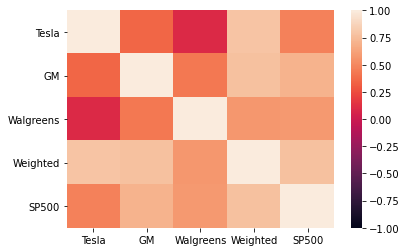

In [423]:
# Plot the correlation
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

In [406]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance of my portfolio to SP500
rolling_covariance_mine = mine_sp500['Weighted'].rolling(window=60).cov(mine_sp500['SP500'])
rolling_covariance_mine

Date
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
                ...   
2020-12-23    0.000129
2020-12-24    0.000127
2020-12-28    0.000125
2020-12-29    0.000120
2020-12-30    0.000115
Length: 251, dtype: float64

In [407]:
# Calculate 60-day rolling variance of S&P 500
rolling_variance_mine=  mine_sp500['SP500'].rolling(window=30).var()
rolling_variance_mine

Date
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
                ...   
2020-12-23    0.000052
2020-12-24    0.000051
2020-12-28    0.000048
2020-12-29    0.000043
2020-12-30    0.000040
Name: SP500, Length: 251, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

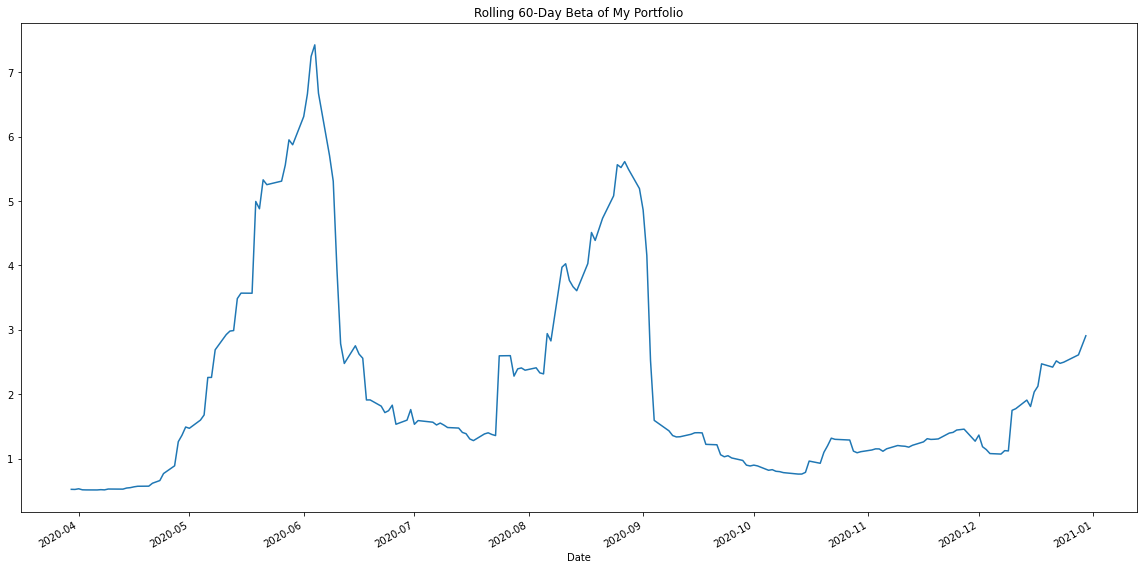

In [408]:
# Calculate 60-day rolling beta of my portfolio and plot the deta
rolling_beta_mine = rolling_covariance_mine / rolling_variance_mine
rolling_beta_mine.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

In [409]:
# find the max value of beta
maxbeta=rolling_beta_mine.max()
print(maxbeta)

7.42817458745721


In [410]:
# find the minimum value of beta
minbeta=rolling_beta_mine.min()
print(minbeta)

0.5119514532664


In [411]:
# find the average value of beta
meanbeta=rolling_beta_mine.mean()
print(meanbeta)

2.152330560193807


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [412]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_mine = ((mine_sp500.mean()-mine_sp500['SP500'].mean()) *252)/(mine_sp500.std()*np.sqrt(252))
sharpe_ratio_mine

Tesla        2.578194
GM           0.171203
Walgreens   -0.997419
Weighted     1.314378
SP500        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of My Portfolio'}>

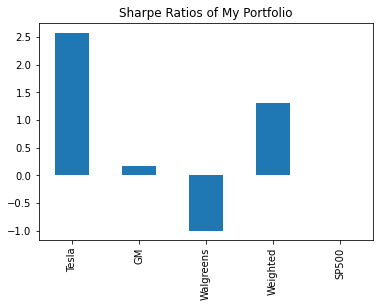

In [391]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_mine.plot(kind='bar', title="Sharpe Ratios of My Portfolio")

In [103]:
### How does your portfolio do?
# Write your answer here!

In [104]:
# Performance
    ## My portfolio is performing better than S&P 500 Index as the average returns for 2020 
    ## is higher than that of S&P
# Risks:
    ## The sharpe ratio of my portfolio is 1.314378 which is considered good.
    ## It means my portfolio generates higher returns with low volatility comparing to S&P 500.
    ## However, the average 60day rolling beta is 2.1523 which means my potfolio is much muore volatile than the index.
    ## Correlations are all positive, yet less than 1. The correlation of the weited average is 0.777229 which indicate
    ## a moderate linar relationshiop.
# Conclustion
    ## I would consider to more diversify the portfolio as the bata is very high, and I prefer less volatile investments.  
